# Insper - Modelagem e Simulação do Mundo Físico

## Atividade - Problema dos tanques ##

**0) Bibliotecas**

Como você já deve saber, os códigos compilados no Jupyter Notebook rodam um na sequência do outro. Se você declara uma variável no começo, pode utilizar essa mesma variável mais adiante.

Dado isso, vamos já importar todas as bibliotecas que serão utilizadas nessa atividade, assim não precisamos ficar importando elas novamente. Para tal, basta rodar o código abaixo antes de ir para o próximo item.

In [1]:
# Importa bibliotecas necessárias
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

**1) Caso 1 (1ª iteração)**

Em aula, encontramos as equações diferenciais que representam um modelo de dois tanques:

<img src="modelo1.png" width=960> 

**1a) Modelo**

Implemente uma função denominada ```modelo``` que recebe uma lista com os estoques $x = [T_1 \quad T_2]$ e o instante de tempo $t$ e retorne uma lista com as taxas de variação dos estoques $\frac{dx}{dt} = [\frac{dT_1}{dt} \quad \frac{dT_1}{dt}]$. Mesmo que sua função não utilize a variável $t$, ela é obrigatória para o correto funcionamento da função ```odeint```.

In [2]:
# Implemente aqui seu código do item 1a

# Declara variáveis globais
d1 = 0.1  # [1/s]
d2 = 0.05 # [1/s]

# Implementa equações diferenciais do modelo
def modelo(x, t):
    # Obtém variáveis T1 e T2, que estão na lista x
    T1 = x[0]
    T2 = x[1]
    # Calcula taxas de variação dT1dt e dT2d2
    dT1dt = -d1*T1
    dT2dt = d1*T1-d2*T2
    # Reagrupa taxas de variação dT1dt e dT2d2 em uma lista de taxas de variação dxdt
    dxdt = [dT1dt, dT2dt]
    # Retorna lista de taxas de variação
    return dxdt

**1b) Resolução numérica**

Agora que você implementou a função ```modelo```, calcule uma lista com uma lista de valores $[[T_1(0) \quad T_1(t_1) \quad \cdots \quad T_1(t_n)]$,$[T_2(0) \quad T_2(t_1) \quad \cdots \quad T_2(t_n)]]$ utilizando a função ```odeint```. Para isso, você vai precisar de:

- Uma lista com as condições iniciais $T_1(0) = 300$kg e $T_2(0) = 0$kg
- Uma lista de tempo $[0 \quad t_1 \quad \cdots \quad t_n]$ com $\Delta t$ bem pequeno (use $\Delta t=10^{-3}s$ em uma lista de tempo de $0$ a $200$s)

In [3]:
# Implemente aqui seu código do item 1b

# Define condições iniciais T1(0) e T2(0) e lista de tempo
T1_0 = 300
T2_0 = 0
x_0 = [T1_0, T2_0]
dt = 1e-3
t_lista = np.arange(0,200,dt)

# Calcula lista com lista de valores de T1(t) e T2(t)
x = odeint(modelo, x_0, t_lista)

**1c) Gráfico**

Por fim, plote um gráfico de $T_1(t)$ e $T_2(t)$ por $t$ (utilize o mesmo par de eixos). Não se esqueça de que a estrutura de dados da solução do `odeint` é uma matriz (um "array"), e por isso precisamos usar um caractere de separação (um "split"). Isso se faz com o código `[:,0]`.

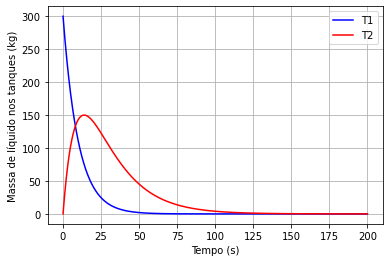

In [4]:
# Implemente aqui seu código do item 1c

# Extrai lista com valores de T1(t) e T2(t)
T1 = x[:,0]
T2 = x[:,1]

# Plota gráfico de T1(t) e T2(t) por t
plt.plot(t_lista, T1, 'b', label = 'T1')
plt.plot(t_lista, T2, 'r', label = 'T2')

# Configura gráfico
plt.xlabel("Tempo (s)")
plt.ylabel("Massa de líquido nos tanques (kg)")
plt.legend()
plt.grid(True)
plt.show()

**2) Caso 2 (2ª iteração)**

Em aula, também encontramos as equações diferenciais que representam uma 2ª iteração do modelo de dois tanques, com a adição de uma bomba e uma válvula no sistema:

<img src="modelo2.png" width=960> 

**2a) Funções**

Implemente as funções $b(T_1)$ e $v(T_2, d_2, t)$ do nosso modelo, correspondentes ao funcionamento da bomba e válvula, respectivamente. Declare a vazão da bomba $Q_b = 14$kg/s como uma variável global e utilize essa variável na função.

In [5]:
# Implemente aqui seu código do item 2a

# Declara vazão da bomba
Qb = 14 # [kg/s]

# Implementa função da bomba
def b(T1):
    if T1/300 > 0.5:
        vazao = Qb
    else:
        vazao = 0
    return vazao


# Implementa funçnao da válvula
def v(T2,d2,t):
    if t < 80:
        vazao = 0
    else:
        vazao = d2*T2
    return vazao

**2b) Modelo**

Reimplemente a função ```modelo``` utilizando as funções que você implementou no item anterior.

In [6]:
# Implemente aqui seu código do item 2b

# Implementa equações diferenciais do modelo
def modelo(x, t):
    # Obtém variáveis T1 e T2, que estão na lista x
    T1 = x[0]
    T2 = x[1]
    # Calcula taxas de variação dT1dt e dT2d2
    dT1dt=-d1*T1+b(T1)
    dT2dt=d1*T1-v(T2,d2,t)-b(T1)
    # Reagrupa taxas de variação dT1dt e dT2d2 em uma lista de taxas de variação dxdt
    dxdt = [dT1dt, dT2dt]
    # Retorna lista de taxas de variação
    return dxdt

**2c) Resolução numérica**

Calcule novamente uma lista com uma lista de valores $[[T_1(0) \quad T_1(t_1) \quad \cdots \quad T_1(t_n)]$,$[T_2(0) \quad T_2(t_1) \quad \cdots \quad T_2(t_n)]]$ utilizando a função ```odeint```. Utilize as mesmas condições iniciais e lista de tempo, mas agora a função de seu novo modelo.

In [7]:
# Implemente aqui seu código do item 2c

# Define condições iniciais T1(0) e T2(0) e lista de tempo
T1_0 = 300
T2_0 = 0
x_0 = [T1_0, T2_0]
dt = 1e-3
t_lista = np.arange(0,200,dt)

# Calcula lista com lista de valores de T1(t) e T2(t)
x = odeint(modelo, x_0, t_lista)

**2d) Gráfico**

Plote novamente o gráfico de $T_1(t)$ e $T_2(t)$ por $t$ (utilize o mesmo par de eixos). Verifique se os resultados estão diferentes do item **1c)** e se fazem sentido.

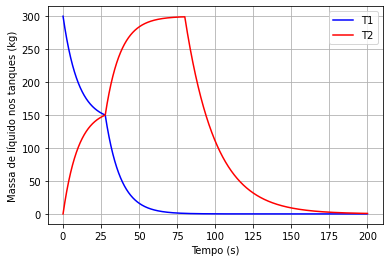

In [8]:
# Implemente aqui seu código do item 2d

# Extrai lista com valores de T1(t) e T2(t)
T1 = x[:,0]
T2 = x[:,1]

# Plota gráfico de T1(t) e T2(t) por t
plt.plot(t_lista, T1, 'b', label="T1")
plt.plot(t_lista, T2, "r", label="T2")

# Configura gráfico
plt.xlabel("Tempo (s)")
plt.ylabel("Massa de líquido nos tanques (kg)")
plt.legend()
plt.grid(True)
plt.show()

**2e) Resolução numércia pelo método de Euler (não porque é melhor, e sim para aprender)**

Agora que você usou a função `odeint`, vamos tentar implementar uma solução numérica para o mesmo modelo usando o método de Euler. Contudo, vamos usar exatamente a mesma função `modelo` que implementamos no item **2b)**. Difícil? Talvez no começo, mas certamente está ao seu alcance! 

Lembre-se que a função `modelo` precisa de uma lista com dois valores e o instante de tempo. Implemente o método de Euler usando seu loop favorito (nesse momento do curso, talvez usar o `for` seja uma boa).

In [9]:
# Implemente aqui seu código do item 2e

# Define condições iniciais T1(0) e T2(0) e lista de tempo
T1_lista = [300]
T2_lista = [0]
dt = 1e-3
t_lista = np.arange(0,200,dt)

# Estrutura de repetição para aplicar o método de Euler
for i in range(0,len(t_lista)-1):
    # Calcula as taxas de variação de T1 e T2 utilizando a função modelo
    x = [T1_lista[i],T2_lista[i]]
    dxdt = modelo(x,t_lista[i])
    dT1dt = dxdt[0]
    dT2dt = dxdt[1]
    # Aplica o método de Euler
    T1_lista.append(T1[i]+dT1dt*dt)
    T2_lista.append(T2[i]+dT2dt*dt)

**2f) Gráfico**

Plote novamente o gráfico de $T_1(t)$ e $T_2(t)$ por $t$ (utilize o mesmo par de eixos). Verifique se os resultados estão iguais ao do item **2d)**.

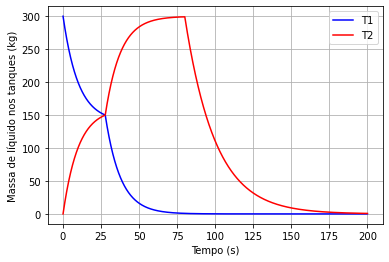

In [10]:
# Implemente aqui seu código do item 2f

# Plota gráfico de T1(t) e T2(t) por t
plt.plot(t_lista, T1_lista, 'b', label="T1")
plt.plot(t_lista, T2_lista, "r", label="T2")

# Configura gráfico
plt.xlabel("Tempo (s)")
plt.ylabel("Massa de líquido nos tanques (kg)")
plt.legend()
plt.grid(True)
plt.show()

**3) DESAFIO (Por enquanto! A partir da próxima aula, vamos encarar como um item normal!)**

Vamos, agora, ver como a variação da vazão da bomba afeta a dinâmica do tanque 1.

**3a) Alterações**

Copie a função $b(T_1)$ e modifique-a de tal modo que a vazão da bomba $Q_b$, em vez de ser uma variável global, seja um parâmetro da função. Ou seja, a função $b(T_1)$ passará a ser $b(T_1, Q_b)$. Da mesma forma, copie também a função `modelo(x, t)`, alterando-a para também receber a vazão como parâmetro, ou seja, `modelo(x, t, Qb)`.

In [11]:
# Implemente aqui seu código do item 3a

# Implementa função da bomba
def b(T1, Qb):
    if T1/300 > 0.5:
        vazao = Qb
    else:
        vazao = 0
    return vazao

# Implementa equações diferenciais do modelo
def modelo(x, t, Qb):
    # Obtém variáveis T1 e T2, que estão na lista x
    T1 = x[0]
    T2 = x[1]
    # Calcula taxas de variação dT1dt e dT2d2
    dT1dt=-d1*T1+b(T1,Qb)
    dT2dt=d1*T1-v(T2,d2,t)-b(T1,Qb)
    # Reagrupa taxas de variação dT1dt e dT2d2 em uma lista de taxas de variação dxdt
    dxdt = [dT1dt, dT2dt]
    # Retorna lista de taxas de variação
    return dxdt

**3b) Gráfico**

Agora implemente uma lista com dois valores de vazão maiores e dois valores de vazão menores do que anteriormente: $[6 \quad 10 \quad 14 \quad 18 \quad 22]$. Em seguida, copie o código do item **2c)** (aquele em que você cria a lista de tempo e executa o `odeint`). Adapte-o para que sejam plotados 5 gráficos para $T_1(t)$ por $t$ no mesmo par de eixos, um para cada valor de vazão. 

Dica: use o seguinte código para plotar legendas no seu gráfico: `plt.plot(listaX, listaY, label='o nome que você quer dar a cada gráfico')`. Difícil? Encare como o desafio da aula! Não hesite em falar com o professor!

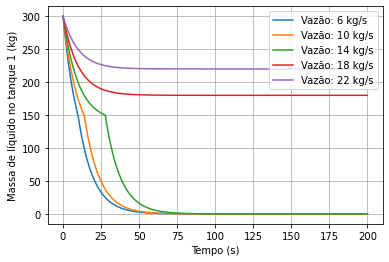

In [13]:
# Implemente aqui seu código do item 3b

# Declara lista de vazões da bomba
Qb_lista = [6,10,14,18,22]

# Estrutura de repetição
for Qi in Qb_lista:
    # Executa a função odeint mas cada vez com um valor diferente de vazão da bomba Qi
    x = odeint(modelo, x_0, t_lista, args=(Qi,))
    # Plota gráfico de T1(t) por t, com legenda da vazão de cada caso
    plt.plot(t_lista, x[:,0], label = 'Vazão: %.0f kg/s' %Qi)
    
# Configura gráfico
plt.xlabel("Tempo (s)")
plt.ylabel("Massa de líquido no tanque 1 (kg)")
plt.legend()
plt.grid(True)
plt.show()